# Regresión lineal
## Objetivo
Técnica predictiva (supervisada) que intenta predecir una variable numérica (dependiente) a partir de otra u otras (independientes) encontrando un modelo lineal
## Entrada
Conjunto de datos de la forma de
$$x_{1}, x_{2}, x_{3}, ... x_{n},    y $$

Donde
- $x_{i}$ son las variables independientes
- $y$ es la variable dependiente

## Salida
**Ecuación** que mejor se ajusta, o describe, al conjunto de datos de entrada $X$ para predecir $y$ de la forma
 $$\widehat{y} = \beta_{0} + \beta_{1} x_{1} + \beta_{1} x_{1} + \beta_{1} x_{1} + ... ++ \beta_{1} x_{1} + \epsilon$$

Donde
- $\widehat{y}$  variable a predecir
- $x_{i}$  son las variables independientes
- $\beta_{i}$  son los coeficientes lineales que multiplican a las variables independientes
- $\epsilon$ error cometido (mientras sea menor es mejor)

In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Regresión lineal
from sklearn import linear_model    ## pip install sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  #métricas de una regresión lineal

# Ejemplo de regresión lineal simple (solo hay una x)
## Lectura de datos de entrada

In [2]:
nTamanoBloque=7
dfOriginal = pd.read_csv ("./datosEntrada/casosxPeriodo_"+str(nTamanoBloque)+"_Dias.csv");
cuantosRegistros = len(dfOriginal.index)  #Cuántos registros de procesarán (TODOS en este caso)

## Generación de dos conjuntos:
- El de las variables independientes (Xs) y
- El de la dependiente (ys)

NOTA: La división en conjunto de entrenamiento y de prueba se hará después (en este caso es serie temporal, no lo consideraremos)

In [3]:
Xs = dfOriginal.iloc[ : cuantosRegistros+1 , [0]]   #Primera columna (xs)
#               iloc[rango de filas        ,columnas]
ys = dfOriginal.iloc[ : cuantosRegistros+1 , [1]]   #Segunda columna (ys)

## Creación del modelo de regresión lineal a partide de $x$ y de $y$

In [4]:
reg = linear_model.LinearRegression()
reg.fit(Xs, ys)

LinearRegression()

### Coeficientes 
- $\beta_{0}$ con reg.intercept_
-  $\beta_{1} $ con reg.coef_


In [5]:
print ("Coeficientes de x",reg.coef_)
print ("Coeficiente independiente", reg.intercept_)
print ("y = ", str(reg.intercept_), "+ (", str(reg.coef_[0]),")x1")

Coeficientes de x [[167.4831643]]
Coeficiente independiente [4033.96551724]
y =  [4033.96551724] + ( [167.4831643] )x1


## Predicción 

In [6]:
yPredicha = reg.predict (Xs)

## Métricas
- Error absoluto medio (MAE) en las unidades de medida de la variable dependiente
- Error cuadrático medio (MSE), son unidades al cuadrado
- Raíz del Error cuadrático medio (RMSE), en las unidades de medida de la variable dependiente
- R^2 R cuadrada. [0,1]  1 es una predicción perfecta.

Tanto el MSE como el RMSE _castigan_ más a las diferencias mayores (por el cuadrado de las diferencias), **mientras más pequeño, es mejor**.

### Fórmulas
$$MAE = \dfrac{\sum_{i=1}^{n} |y_i - \widehat{y}_i|}{n } $$
$$MSE = \dfrac{\sum_{i=1}^{n} (y_i - \widehat{y}_i)^{2}}{n } $$
$$RMSE = \sqrt{\dfrac{\sum_{i=1}^{n} (y_i - \widehat{y}_i)^{2}}{n } }$$

$$R^{2} = \dfrac{\sum_{i=1}^{n} (\widehat{y}_i - \overline{y})^{2}}{\sum_{i=1}^{n} (y_i - \overline{y})^{2}}$$

In [7]:
mse = mean_squared_error(ys, yPredicha)   #El cuadrado de la unidad de medida
rmse= mse ** (1/2)
mae = mean_absolute_error(ys, yPredicha)
R2  = r2_score(ys, yPredicha)
print ("Media aritmética", yPredicha.mean())
print ()
print ("MSE =",mse, "unidades cuadradas")
print ("RMSE=",  rmse)
print ("MAE =",mae)
print ()
print ("R^2=",R2)

Media aritmética 11151.999999999998

MSE = 76136226.92271334 unidades cuadradas
RMSE= 8725.607538888817
MAE = 6331.972168498514

R^2= 0.18503255897633863


## Gráfica con
- Datos de entrada
- Ecuación lineal encontrada
- Media de casos

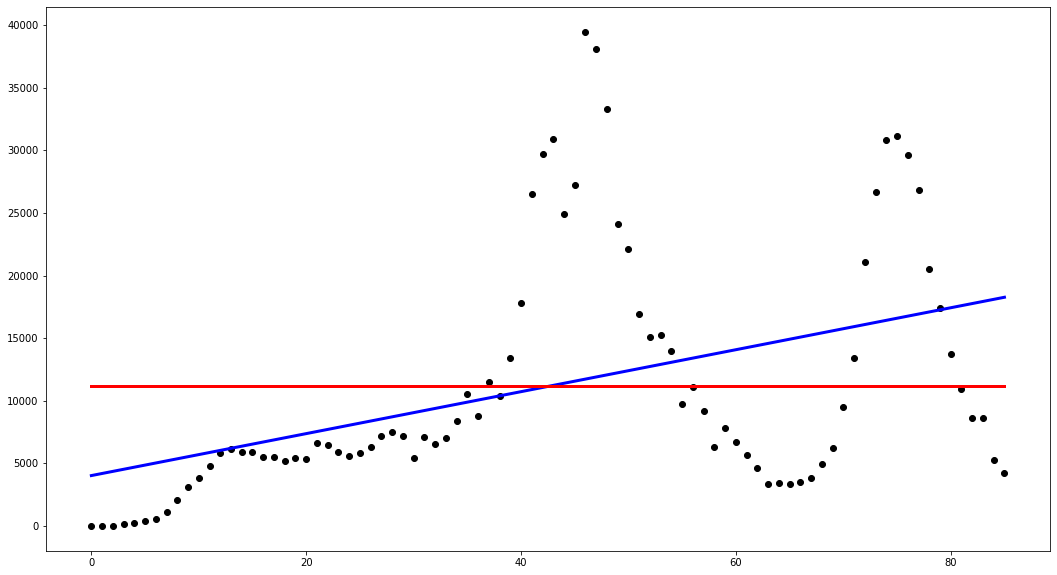

In [8]:
plt.figure (num=1, figsize=(18,10))
#1 es un identificador (ID)

plt.scatter(Xs, ys,  color='black') # Diagrama de dispersión

plt.plot(Xs, yPredicha, color='blue', linewidth=3) #Diagrama de líneas

media = np.full(len(yPredicha),yPredicha.mean()) #serie que repite la media n veces (así parece una línea)
plt.plot(Xs, media, color="red", linewidth=3)   #Media


In [9]:
import datetime as dt
print ("Fin del notebook", dt.datetime.today())

Fin del notebook 2021-10-14 19:57:27.467510
